In [47]:
!pip install matplotlib numpy pandas scikit-learn requests

In [48]:
!pwd

/content


In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import requests

In [50]:
# load dataset gdp_per_capita and save them in /content

gdp_per_capita_url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv'
gdp_per_capita_url_r = requests.get(gdp_per_capita_url, allow_redirects=True)
open('gdp_per_capita.csv', 'wb').write(gdp_per_capita_url_r.content)



36323

In [51]:
# load dataset oecd_bli_2015 and save them in /content

oecd_bli_2015_url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv'
oecd_bli_2015_url_r = requests.get(oecd_bli_2015_url, allow_redirects=True)
open('oecd_bli_2015.csv', 'wb').write(oecd_bli_2015_url_r.content)



405467

In [0]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [53]:
gdp_per_capita, oecd_bli

(                                               Country  ... Estimates Start After
 0                                          Afghanistan  ...                2013.0
 1                                              Albania  ...                2010.0
 2                                              Algeria  ...                2014.0
 3                                               Angola  ...                2014.0
 4                                  Antigua and Barbuda  ...                2011.0
 5                                            Argentina  ...                2013.0
 6                                              Armenia  ...                2014.0
 7                                            Australia  ...                2014.0
 8                                              Austria  ...                2015.0
 9                                           Azerbaijan  ...                2014.0
 10                                         The Bahamas  ...                2013.0
 11 

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


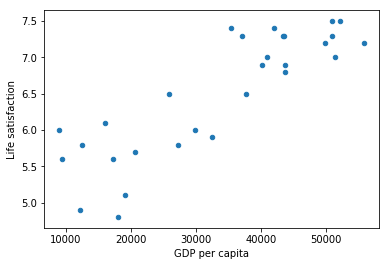

In [56]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [0]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [58]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Make a prediction for Mexico
X_new = [[8902.83]]  # Mexico' GDP per capita --> https://www.google.com/search?rlz=1C5CHFA_enUS769US769&q=mexico+gdp+per+capita&stick=H4sIAAAAAAAAAOPgUeLUz9U3SLI0iC_SMstOttLPyU9OLMnMz9MvLgHSxSWZyYk58UWp6UAhq_SUgvi8_NzMPKBQQWpRfHJiQWZJ4iJW0dzUiszkfAWgvAJQXAEiDgA6JgCnXQAAAA&sa=X&ved=2ahUKEwjZ8f-8x73jAhWqwlQKHXWCD5QQtx8wHHoECBEQEg&biw=1440&bih=756
print(model.predict(X_new)) 

[[5.29031927]]
